In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import unicodedata
from html import unescape

from sklearnex import patch_sklearn
patch_sklearn()

from sklearnex.svm import SVC
from sklearn.metrics import accuracy_score as accuracy
from sklearnex.linear_model import LogisticRegression as LR
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score as accuracy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer as tfidf
from sklearn.preprocessing import MaxAbsScaler


import sys; sys.path.insert(0, '../') #adds all the code we've written in src
from preprocessing import *

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
df = pd.read_csv("../../cyberbullying_tweets/tweets_with_lang.csv", index_col = 0)
df.groupby("cyberbullying_type").count()

,tweet_text,lang,score
cyberbullying_type,,,
age,7992,7992,7992
ethnicity,7961,7961,7961
gender,7973,7973,7973
not_cyberbullying,7945,7945,7945
other_cyberbullying,7823,7823,7823
religion,7998,7998,7998


In [5]:
len(df)

47692

In [100]:
df = pd.read_csv("../../cyberbullying_tweets/tweets_with_lang.csv", index_col = 0)
df_en = df[df.lang == 'en'].copy().reset_index(drop = True)
cat_dict = {}
for i, type in enumerate(df.cyberbullying_type.unique()):
    cat_dict[type] = i 
    
df_en["y"] = df_en.cyberbullying_type.map(cat_dict)


df_en["tweet_length"] = df_en.tweet_text.apply(len)

tweets = df_en.tweet_text.copy()
tweets = tweets.apply(to_ascii)
tweets = replace_ats_with_token(tweets)
tweets = remove_links(tweets)
tweets = to_lowercase(tweets)
tweets = tweets.apply(remove_punctuation)
tweets = remove_emoji(tweets)


df_en["ascii"] = tweets.copy()
df_en["ascii_length"] = df_en.ascii.apply(len)

idx = np.where((df_en.tweet_length < 300) & (df_en.ascii_length < 280))
df_en = df_en.loc[idx].reset_index(drop = True)

C:\Users\Ayush\AppData\Local\Temp/ipykernel_76972/2107884103.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(at_regex, "@")
C:\Users\Ayush\AppData\Local\Temp/ipykernel_76972/2107884103.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(url_regex, "")


In [101]:
df_en = df_en[~df_en.duplicated("ascii")].reset_index(drop = True)

In [118]:
df_en = df_en[df_en.ascii_length > 20].reset_index(drop = True)
df_en

,tweet_text,cyberbullying_type,lang,score,y,tweet_length,ascii,ascii_length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999,0,61,in other words katandandre your food was crapi...,57
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994,0,115,why is aussietv so white mkr theblock imaceleb...,104
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997,0,60,@ a classy whore or more red velvet cupcakes,44
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996,0,103,@ meh p thanks for the heads up but not too c...,90
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998,0,103,@ this is an isis account pretending to be a k...,87
...,...,...,...,...,...,...,...,...
41171,"Black ppl aren't expected to do anything, depe...",ethnicity,en,0.999998,5,234,black ppl arent expected to do anything depend...,227
41172,Turner did not withhold his disappointment. Tu...,ethnicity,en,0.999995,5,276,turner did not withhold his disappointment tur...,268
41173,I swear to God. This dumb nigger bitch. I have...,ethnicity,en,0.999995,5,104,i swear to god this dumb nigger bitch i have g...,94
41174,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,en,0.857141,5,90,yea fuck you rt @ if youre a nigger fucking un...,76


In [119]:
df_en.to_csv("../../cyberbullying_tweets/processed_tweets.csv")

In [104]:
test_preprocess(df_en.ascii, df_en.y)

C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality
(34030, 41443)
(8508, 41443)

BOW Embedding Classification Report
              precision    recall  f1-score   support

           0       0.61      0.64      0.63      1371
           1       0.91      0.84      0.87      1497
           2       0.95      0.94      0.94      1492
           3       0.59      0.64      0.61      1117
           4       0.97      0.97      0.97      1543
           5       0.98      0.97      0.98      1488

    accuracy                           0.85      8508
   macro avg       0.84      0.83      0.83      8508
weighted avg       0.85      0.85      0.85      8508

0.845322049835449

TF-IDF Embedding Classification Report
              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1371
           1       0.91      0.83      0.87      1497
           2       0.93      0.95      0.94      1492
           3       0.60      0.63      0.62      1117
           4       0.95      0.97      0.

In [116]:
accuracies = []
for length in range(1, 30): 
    df_long = df_en[~(df_en.ascii_length < length)].copy().reset_index()

    X_train, X_test, y_train, y_test = train_test_split(df_long.ascii, df_long.y, test_size=0.2, random_state=42)

    vectorizer = CountVectorizer(tokenizer=word_tokenize, analyzer = 'word', stop_words=None, ngram_range=(1,1), lowercase=False)
    vectorizer.fit(X_train)

    X_train_bow = vectorizer.transform(X_train)
    X_test_bow = vectorizer.transform(X_test)

    print(f"Input Dimensionality - Removed {length}")
    print(X_train_bow.shape)
    print(X_test_bow.shape)
    print()

    log_reg = LR(max_iter=10000, solver = 'saga', 
                 multi_class='multinomial').fit(X_train_bow, y_train)
    y_pred = log_reg.predict(X_test_bow)
    
    print(classification_report(y_test, y_pred))
    print(accuracy(y_test, y_pred))
    
    accuracies.append(accuracy(y_test, y_pred))

C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 1
(34029, 41425)
(8508, 41425)

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      1371
           1       0.90      0.84      0.87      1496
           2       0.95      0.94      0.95      1493
           3       0.57      0.60      0.59      1117
           4       0.97      0.97      0.97      1525
           5       0.99      0.97      0.98      1506

    accuracy                           0.84      8508
   macro avg       0.83      0.83      0.83      8508
weighted avg       0.85      0.84      0.84      8508

0.8400329102021626


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 2
(34024, 41522)
(8507, 41522)

              precision    recall  f1-score   support

           0       0.61      0.64      0.62      1370
           1       0.91      0.86      0.88      1481
           2       0.96      0.94      0.95      1565
           3       0.59      0.64      0.61      1081
           4       0.97      0.97      0.97      1546
           5       0.99      0.97      0.98      1464

    accuracy                           0.85      8507
   macro avg       0.84      0.83      0.84      8507
weighted avg       0.85      0.85      0.85      8507

0.848242623721641


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 3
(34021, 41502)
(8506, 41502)

              precision    recall  f1-score   support

           0       0.59      0.64      0.61      1370
           1       0.91      0.84      0.87      1473
           2       0.95      0.94      0.94      1538
           3       0.59      0.61      0.60      1122
           4       0.97      0.97      0.97      1505
           5       0.98      0.98      0.98      1498

    accuracy                           0.84      8506
   macro avg       0.83      0.83      0.83      8506
weighted avg       0.85      0.84      0.84      8506

0.8425817070303315


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 4
(34012, 41460)
(8504, 41460)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1371
           1       0.91      0.84      0.87      1477
           2       0.96      0.94      0.95      1550
           3       0.57      0.62      0.59      1071
           4       0.96      0.97      0.97      1562
           5       0.98      0.98      0.98      1473

    accuracy                           0.84      8504
   macro avg       0.83      0.83      0.83      8504
weighted avg       0.85      0.84      0.84      8504

0.8419567262464722


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 5
(33988, 41413)
(8498, 41413)

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1366
           1       0.91      0.84      0.87      1479
           2       0.96      0.94      0.95      1563
           3       0.55      0.61      0.58      1078
           4       0.97      0.97      0.97      1565
           5       0.98      0.98      0.98      1447

    accuracy                           0.84      8498
   macro avg       0.83      0.83      0.83      8498
weighted avg       0.85      0.84      0.84      8498

0.8417274652859497


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 6
(33954, 41482)
(8489, 41482)

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1360
           1       0.91      0.85      0.88      1483
           2       0.97      0.94      0.95      1547
           3       0.61      0.63      0.62      1106
           4       0.97      0.98      0.97      1517
           5       0.98      0.98      0.98      1476

    accuracy                           0.85      8489
   macro avg       0.84      0.84      0.84      8489
weighted avg       0.86      0.85      0.86      8489

0.8529862174578867


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 7
(33923, 41657)
(8481, 41657)

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1354
           1       0.90      0.84      0.87      1474
           2       0.96      0.94      0.95      1544
           3       0.58      0.63      0.60      1051
           4       0.98      0.97      0.98      1571
           5       0.98      0.98      0.98      1487

    accuracy                           0.85      8481
   macro avg       0.83      0.83      0.83      8481
weighted avg       0.85      0.85      0.85      8481

0.8468340997523877


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 8
(33884, 41638)
(8472, 41638)

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      1350
           1       0.89      0.83      0.86      1496
           2       0.96      0.94      0.95      1541
           3       0.58      0.65      0.61      1100
           4       0.97      0.98      0.97      1519
           5       0.98      0.97      0.98      1466

    accuracy                           0.84      8472
   macro avg       0.83      0.83      0.83      8472
weighted avg       0.85      0.84      0.84      8472

0.8424220963172805


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 9
(33837, 41447)
(8460, 41447)

              precision    recall  f1-score   support

           0       0.61      0.67      0.64      1342
           1       0.92      0.84      0.87      1489
           2       0.95      0.95      0.95      1555
           3       0.58      0.59      0.59      1059
           4       0.98      0.97      0.97      1571
           5       0.98      0.98      0.98      1444

    accuracy                           0.85      8460
   macro avg       0.84      0.83      0.83      8460
weighted avg       0.86      0.85      0.85      8460

0.85


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 10
(33775, 41328)
(8444, 41328)

              precision    recall  f1-score   support

           0       0.63      0.63      0.63      1337
           1       0.91      0.86      0.89      1490
           2       0.96      0.95      0.95      1518
           3       0.59      0.66      0.62      1071
           4       0.97      0.97      0.97      1504
           5       0.98      0.98      0.98      1524

    accuracy                           0.85      8444
   macro avg       0.84      0.84      0.84      8444
weighted avg       0.86      0.85      0.86      8444

0.8545712932259593


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 11
(33720, 41451)
(8431, 41451)

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1329
           1       0.90      0.85      0.87      1481
           2       0.95      0.94      0.95      1560
           3       0.57      0.64      0.60      1072
           4       0.96      0.97      0.97      1523
           5       0.99      0.97      0.98      1466

    accuracy                           0.84      8431
   macro avg       0.83      0.83      0.83      8431
weighted avg       0.85      0.84      0.85      8431

0.8443838216107223


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 12
(33653, 41372)
(8414, 41372)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1321
           1       0.90      0.86      0.88      1460
           2       0.96      0.95      0.95      1579
           3       0.59      0.63      0.61      1031
           4       0.98      0.98      0.98      1544
           5       0.98      0.98      0.98      1479

    accuracy                           0.85      8414
   macro avg       0.84      0.84      0.84      8414
weighted avg       0.86      0.85      0.86      8414

0.8545281673401474


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 13
(33594, 41547)
(8399, 41547)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1315
           1       0.90      0.84      0.87      1462
           2       0.96      0.94      0.95      1567
           3       0.56      0.64      0.60       988
           4       0.98      0.98      0.98      1548
           5       0.98      0.98      0.98      1519

    accuracy                           0.85      8399
   macro avg       0.83      0.83      0.83      8399
weighted avg       0.86      0.85      0.85      8399

0.8503393261102512


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 14
(33519, 41411)
(8380, 41411)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1311
           1       0.90      0.86      0.88      1467
           2       0.96      0.94      0.95      1568
           3       0.59      0.63      0.61      1057
           4       0.97      0.97      0.97      1522
           5       0.99      0.98      0.99      1455

    accuracy                           0.85      8380
   macro avg       0.84      0.83      0.83      8380
weighted avg       0.85      0.85      0.85      8380

0.8502386634844868


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 15
(33439, 41563)
(8360, 41563)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1300
           1       0.89      0.86      0.88      1436
           2       0.96      0.94      0.95      1568
           3       0.58      0.63      0.60      1027
           4       0.97      0.97      0.97      1575
           5       0.98      0.99      0.99      1454

    accuracy                           0.85      8360
   macro avg       0.83      0.83      0.83      8360
weighted avg       0.86      0.85      0.85      8360

0.8521531100478469


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 16
(33356, 41375)
(8339, 41375)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61      1288
           1       0.91      0.85      0.88      1465
           2       0.96      0.95      0.95      1552
           3       0.57      0.63      0.60      1002
           4       0.97      0.97      0.97      1545
           5       0.99      0.98      0.98      1487

    accuracy                           0.85      8339
   macro avg       0.84      0.83      0.83      8339
weighted avg       0.86      0.85      0.85      8339

0.8519007075188871


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 17
(33280, 41319)
(8321, 41319)

              precision    recall  f1-score   support

           0       0.62      0.63      0.62      1276
           1       0.91      0.84      0.87      1454
           2       0.96      0.95      0.95      1567
           3       0.58      0.65      0.61      1015
           4       0.97      0.98      0.97      1534
           5       0.98      0.97      0.98      1475

    accuracy                           0.85      8321
   macro avg       0.84      0.83      0.84      8321
weighted avg       0.86      0.85      0.85      8321

0.8523014060809999


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 18
(33198, 41246)
(8300, 41246)

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1266
           1       0.89      0.85      0.87      1471
           2       0.96      0.95      0.96      1557
           3       0.57      0.63      0.60       969
           4       0.98      0.97      0.97      1571
           5       0.98      0.98      0.98      1466

    accuracy                           0.85      8300
   macro avg       0.83      0.83      0.83      8300
weighted avg       0.86      0.85      0.85      8300

0.8521686746987952


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 19
(33107, 41264)
(8277, 41264)

              precision    recall  f1-score   support

           0       0.62      0.63      0.63      1259
           1       0.91      0.85      0.88      1441
           2       0.95      0.95      0.95      1572
           3       0.59      0.64      0.61       988
           4       0.97      0.97      0.97      1540
           5       0.98      0.98      0.98      1477

    accuracy                           0.85      8277
   macro avg       0.84      0.84      0.84      8277
weighted avg       0.86      0.85      0.86      8277

0.8548991180379365


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 20
(33020, 41355)
(8255, 41355)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1247
           1       0.91      0.86      0.89      1444
           2       0.95      0.95      0.95      1573
           3       0.58      0.63      0.61       986
           4       0.98      0.98      0.98      1556
           5       0.99      0.98      0.98      1449

    accuracy                           0.86      8255
   macro avg       0.84      0.84      0.84      8255
weighted avg       0.86      0.86      0.86      8255

0.8581465778316172


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 21
(32940, 41409)
(8236, 41409)

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      1232
           1       0.91      0.85      0.88      1447
           2       0.96      0.94      0.95      1552
           3       0.59      0.63      0.61       957
           4       0.97      0.97      0.97      1598
           5       0.98      0.97      0.98      1450

    accuracy                           0.86      8236
   macro avg       0.84      0.84      0.84      8236
weighted avg       0.86      0.86      0.86      8236

0.8570908207867897


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 22
(32854, 41312)
(8214, 41312)

              precision    recall  f1-score   support

           0       0.62      0.65      0.63      1221
           1       0.90      0.85      0.88      1416
           2       0.96      0.95      0.95      1584
           3       0.59      0.62      0.60       959
           4       0.97      0.98      0.97      1566
           5       0.99      0.98      0.98      1468

    accuracy                           0.86      8214
   macro avg       0.84      0.84      0.84      8214
weighted avg       0.86      0.86      0.86      8214

0.8590211833455077


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 23
(32762, 41235)
(8191, 41235)

              precision    recall  f1-score   support

           0       0.60      0.63      0.62      1210
           1       0.91      0.85      0.88      1448
           2       0.95      0.95      0.95      1551
           3       0.59      0.63      0.61       955
           4       0.97      0.97      0.97      1576
           5       0.99      0.98      0.98      1451

    accuracy                           0.85      8191
   macro avg       0.83      0.83      0.83      8191
weighted avg       0.86      0.85      0.86      8191

0.8549627640092785


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 24
(32668, 41168)
(8168, 41168)

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      1196
           1       0.90      0.86      0.88      1437
           2       0.95      0.94      0.95      1571
           3       0.58      0.63      0.60       954
           4       0.97      0.96      0.96      1580
           5       0.98      0.97      0.98      1430

    accuracy                           0.85      8168
   macro avg       0.83      0.83      0.83      8168
weighted avg       0.86      0.85      0.85      8168

0.8517384916748286


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 25
(32556, 41328)
(8139, 41328)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1192
           1       0.89      0.85      0.87      1421
           2       0.97      0.94      0.95      1558
           3       0.59      0.63      0.61       954
           4       0.97      0.97      0.97      1574
           5       0.98      0.98      0.98      1440

    accuracy                           0.86      8139
   macro avg       0.84      0.83      0.83      8139
weighted avg       0.86      0.86      0.86      8139

0.856370561494041


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 26
(32436, 41446)
(8109, 41446)

              precision    recall  f1-score   support

           0       0.63      0.62      0.62      1180
           1       0.91      0.86      0.89      1421
           2       0.96      0.94      0.95      1552
           3       0.58      0.66      0.62       911
           4       0.97      0.97      0.97      1598
           5       0.99      0.98      0.99      1447

    accuracy                           0.86      8109
   macro avg       0.84      0.84      0.84      8109
weighted avg       0.87      0.86      0.87      8109

0.863238377111851


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 27
(32328, 41391)
(8083, 41391)

              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1165
           1       0.91      0.87      0.89      1418
           2       0.96      0.94      0.95      1544
           3       0.58      0.61      0.59       913
           4       0.97      0.98      0.97      1560
           5       0.98      0.98      0.98      1483

    accuracy                           0.86      8083
   macro avg       0.83      0.83      0.83      8083
weighted avg       0.86      0.86      0.86      8083

0.8599529877520723


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 28
(32220, 41091)
(8055, 41091)

              precision    recall  f1-score   support

           0       0.61      0.63      0.62      1157
           1       0.92      0.86      0.88      1426
           2       0.96      0.95      0.95      1524
           3       0.58      0.64      0.61       895
           4       0.98      0.97      0.97      1613
           5       0.99      0.97      0.98      1440

    accuracy                           0.86      8055
   macro avg       0.84      0.84      0.84      8055
weighted avg       0.87      0.86      0.86      8055

0.8621973929236499


C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality - Removed 29
(32102, 41266)
(8026, 41266)

              precision    recall  f1-score   support

           0       0.60      0.61      0.61      1146
           1       0.89      0.84      0.87      1415
           2       0.96      0.95      0.95      1535
           3       0.57      0.62      0.59       901
           4       0.97      0.97      0.97      1588
           5       0.98      0.98      0.98      1441

    accuracy                           0.85      8026
   macro avg       0.83      0.83      0.83      8026
weighted avg       0.86      0.85      0.86      8026

0.8548467480687765


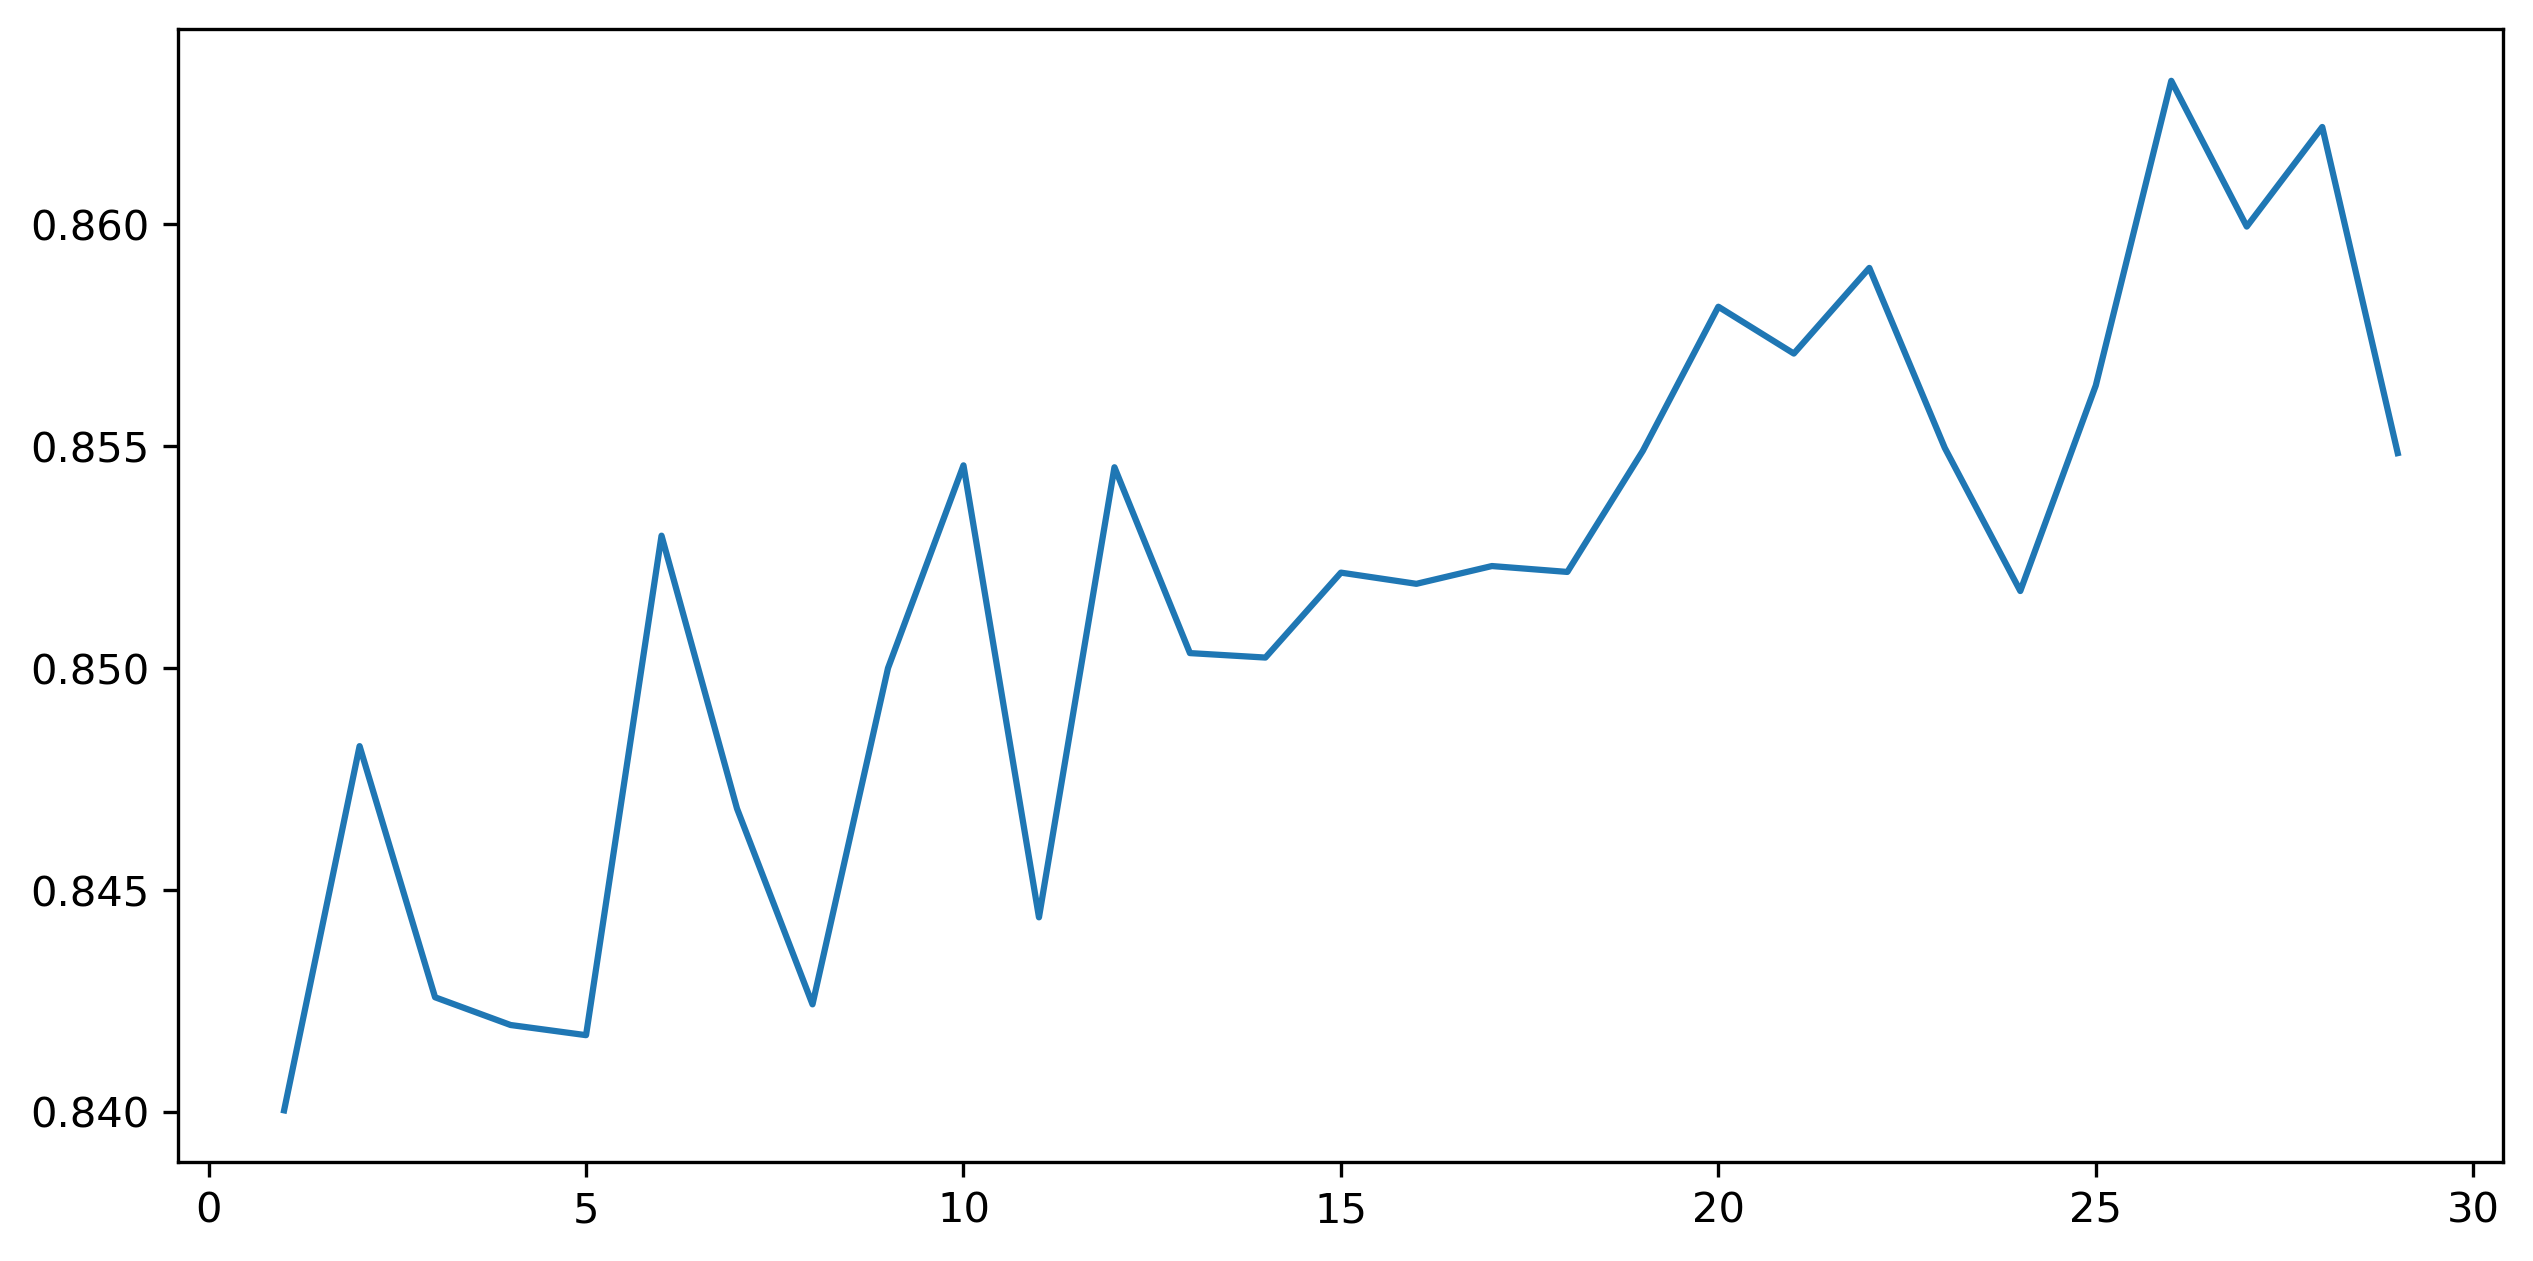

In [117]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.dpi"] = 300

plt.plot(list(range(1, 30)), accuracies)

In [7]:
df_en[["cyberbullying_type", "tweet_length"]].groupby("cyberbullying_type").agg(
    {"tweet_length": [np.mean, max, min]})

tweet_length          
                            mean   max min
cyberbullying_type                        
age                   173.569612  1585  11
ethnicity             139.381520  1869   5
gender                136.544027  1431   2
not_cyberbullying      83.189189  1809   2
other_cyberbullying    85.357788  5018   1
religion              197.975928   568   7

In [79]:
def to_ascii(tweet): 
    tweet = unescape(tweet)
    return unicodedata.normalize('NFKD', tweet).encode('ascii', 'ignore').decode()

def remove_punctuation(text): 
    my_punct = ['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.',
           '/', ':', ';', '<', '=', '>', '?', '[', '\\', ']', '^', '_', 
           '`', '{', '|', '}', '~', '»', '«', '“', '”', '#']
    punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
    return re.sub(punct_pattern, "", text) # the "-" symbol should remain)

def remove_nums(text_arr): 
    numbers = r"[0-9]+"
    return text_arr.str.replace(numbers, "")

def remove_links(text_arr): 
    url_regex = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
    return text_arr.str.replace(url_regex, "")

def replace_ats_with_token(text_arr): 
    at_regex = r"@[^\s]+"
    return text_arr.str.replace(at_regex, "@")

tweets = df_en.tweet_text.copy()
tweets = tweets.apply(to_ascii)
tweets = replace_ats_with_token(tweets)
tweets = remove_links(tweets)
tweets = to_lowercase(tweets)
tweets = tweets.apply(remove_punctuation)
tweets = remove_emoji(tweets)


C:\Users\Ayush\AppData\Local\Temp/ipykernel_76972/2107884103.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(at_regex, "@")
C:\Users\Ayush\AppData\Local\Temp/ipykernel_76972/2107884103.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  return text_arr.str.replace(url_regex, "")


In [80]:
tweets

0        in other words #katandandre, your food was cra...
1        why is #aussietv so white? #mkr #theblock #ima...
2           @ a classy whore? or more red velvet cupcakes?
3        @ meh. :p  thanks for the heads up, but not to...
4        @ this is an isis account pretending to be a k...
                               ...                        
44615    black ppl aren't expected to do anything, depe...
44616    turner did not withhold his disappointment. tu...
44617    i swear to god. this dumb nigger bitch. i have...
44618    yea fuck you rt @ if youre a nigger fucking un...
44619    bro. u gotta chill rt @ dog fuck kp that dumb ...
Name: tweet_text, Length: 42926, dtype: object

In [70]:
df_en["tweet_length"] = df_en.tweet_text.apply(len)
df_en[["cyberbullying_type", "tweet_length"]].groupby("cyberbullying_type").agg(
    {"tweet_length": [np.mean, max, min]})

tweet_length         
                            mean  max min
cyberbullying_type                       
age                   166.919941  294  11
ethnicity             132.684188  293   5
gender                131.413249  298   2
not_cyberbullying      82.672244  174   2
other_cyberbullying    83.767675  199   1
religion              189.402588  299   7

In [77]:
def test_preprocess(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    vectorizer = CountVectorizer(tokenizer=word_tokenize, analyzer = 'word', stop_words=None, ngram_range=(1,1), lowercase=False)
    vectorizer.fit(X_train)

    X_train_bow = vectorizer.transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    print("Input Dimensionality")
    print(X_train_bow.shape)
    print(X_test_bow.shape)
    print()

    log_reg = LR(max_iter=10000, solver = 'saga', 
                 multi_class='multinomial').fit(X_train_bow, y_train)
    y_pred = log_reg.predict(X_test_bow)
    print("BOW Embedding Classification Report")
    print(classification_report(y_test, y_pred))
    print(accuracy(y_test, y_pred ))
    print()

    tf_vectorizer = tfidf()
    tf_vectorizer.fit(X_train_bow)

    X_train_tfidf = tf_vectorizer.transform(X_train_bow)
    X_test_tfidf = tf_vectorizer.transform(X_test_bow)

    log_reg_tfidf = LR(max_iter=10000, solver = 'saga', 
                      multi_class='multinomial').fit(X_train_tfidf, y_train)
    y_pred_tfidf = log_reg_tfidf.predict(X_test_tfidf)
    
    print("TF-IDF Embedding Classification Report")
    print(classification_report(y_test, y_pred_tfidf))
    print(accuracy(y_test, y_pred_tfidf))


In [88]:
df_en["processed"] = tweets
df_en

,tweet_text,cyberbullying_type,lang,score,y,tweet_length,processed,processed_tweet_length,ascii_length,ascii
0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999,0,61,"in other words #katandandre, your food was cra...",61,61,"in other words #katandandre, your food was cra..."
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994,0,115,why is #aussietv so white? #mkr #theblock #ima...,115,115,why is #aussietv so white? #mkr #theblock #ima...
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997,0,60,@ a classy whore? or more red velvet cupcakes?,60,60,@xochitlsuckkks a classy whore? or more red ve...
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996,0,103,"@ meh. :p thanks for the heads up, but not to...",103,103,"@jason_gio meh. :p thanks for the heads up, b..."
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998,0,103,@ this is an isis account pretending to be a k...,103,103,@rudhoeenglish this is an isis account pretend...
...,...,...,...,...,...,...,...,...,...,...
44615,"Black ppl aren't expected to do anything, depe...",ethnicity,en,0.999998,5,234,"black ppl aren't expected to do anything, depe...",235,235,"black ppl are not expected to do anything, dep..."
44616,Turner did not withhold his disappointment. Tu...,ethnicity,en,0.999995,5,276,turner did not withhold his disappointment. tu...,276,272,turner did not withhold his disappointment. tu...
44617,I swear to God. This dumb nigger bitch. I have...,ethnicity,en,0.999995,5,104,i swear to god. this dumb nigger bitch. i have...,104,101,i swear to god. this dumb nigger bitch. i have...
44618,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,en,0.857141,5,90,yea fuck you rt @ if youre a nigger fucking un...,92,92,yea fuck you rt @therealexel: if you are a nig...


In [92]:
df_en = df_en[~df_en.duplicated("processed")].reset_index()
df_en

,index,tweet_text,cyberbullying_type,lang,score,y,tweet_length,processed,processed_tweet_length,ascii_length,ascii
0,0,"In other words #katandandre, your food was cra...",not_cyberbullying,en,0.999999,0,61,"in other words #katandandre, your food was cra...",61,61,"in other words #katandandre, your food was cra..."
1,1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,en,0.999994,0,115,why is #aussietv so white? #mkr #theblock #ima...,115,115,why is #aussietv so white? #mkr #theblock #ima...
2,2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,en,0.999997,0,60,@ a classy whore? or more red velvet cupcakes?,60,60,@xochitlsuckkks a classy whore? or more red ve...
3,3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,en,0.999996,0,103,"@ meh. :p thanks for the heads up, but not to...",103,103,"@jason_gio meh. :p thanks for the heads up, b..."
4,4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,en,0.999998,0,103,@ this is an isis account pretending to be a k...,103,103,@rudhoeenglish this is an isis account pretend...
...,...,...,...,...,...,...,...,...,...,...,...
41121,44615,"Black ppl aren't expected to do anything, depe...",ethnicity,en,0.999998,5,234,"black ppl aren't expected to do anything, depe...",235,235,"black ppl are not expected to do anything, dep..."
41122,44616,Turner did not withhold his disappointment. Tu...,ethnicity,en,0.999995,5,276,turner did not withhold his disappointment. tu...,276,272,turner did not withhold his disappointment. tu...
41123,44617,I swear to God. This dumb nigger bitch. I have...,ethnicity,en,0.999995,5,104,i swear to god. this dumb nigger bitch. i have...,104,101,i swear to god. this dumb nigger bitch. i have...
41124,44618,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,en,0.857141,5,90,yea fuck you rt @ if youre a nigger fucking un...,92,92,yea fuck you rt @therealexel: if you are a nig...


In [94]:
test_preprocess(df_en.processed, df_en.y)

C:\Users\Ayush\.conda\envs\nlp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Input Dimensionality
(32900, 38392)
(8226, 38392)

BOW Embedding Classification Report
              precision    recall  f1-score   support

           0       0.62      0.65      0.64      1361
           1       0.90      0.85      0.87      1438
           2       0.95      0.94      0.95      1433
           3       0.62      0.62      0.62      1107
           4       0.96      0.98      0.97      1446
           5       0.99      0.98      0.98      1441

    accuracy                           0.85      8226
   macro avg       0.84      0.84      0.84      8226
weighted avg       0.85      0.85      0.85      8226

0.8482859226841721

TF-IDF Embedding Classification Report
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1361
           1       0.90      0.84      0.87      1438
           2       0.92      0.95      0.94      1433
           3       0.61      0.63      0.62      1107
           4       0.95      0.98      0

In [47]:
df_en["ascii_length"] = df_en.ascii.apply(len)
df_en[["cyberbullying_type", "ascii_length"]].groupby("cyberbullying_type").agg(
    {"ascii_length": [np.mean, max, min, "count"]})

ascii_length                
                            mean   max min count
cyberbullying_type                              
age                   172.907477  1526  11  7944
ethnicity             138.501287  1817   0  7381
gender                133.461991  1413   0  7643
not_cyberbullying      80.316560  1750   0  6697
other_cyberbullying    81.739218  4733   0  6979
religion              196.413992   534   7  7976

In [85]:
df_en.duplicated("processed").sum()

1578

In [50]:
tweet = df_en.loc[2537, "ascii"]
tweet

'he embellished the afternoon with moustachioed feints & flicks. by throwing him an england shirt mercer made a statement about the game\r\nzoe is rocking the stage. \r\nanother home visits round?! i am literally fucking done #mkr\r\ntoday has finally arrived #gkmc\r\ni am fucking going to san francisco on tuesday!!!!!!!!!!!!\r\ni am on the edge... of glory\r\n@nizarnayouf there were no us commandos.\r\ni hate these girls, far out. #mkr\r\nrt @oh_tobs: bless i totally forgot about the party favourite shaz... #mkr\r\ni went old school and changed my other account\'s name back to @stacegots which was my original twitter name back in 08/09.\r\n@gladysmcgee18 +face the dregs of humanity, see how truly foul they are and fight back\r\nso fuck robert a douglass\r\nbully beatdown got a girl bully this time.\r\n@ukbrawlers i cannot\r\nfeeling so sorry for the girls, they should be safe and kat and andre should be going home #mkr\r\nmy patreon is acting weird. just got a monthly payment (yay!) b

In [ ]:
len(pd.read_csv("long_tweets.csv"))

In [9]:
df_en[df_en.tweet_length > 280].to_csv("long_tweets.csv")

In [13]:
lang_df = df.groupby("lang").count().sort_values('score', ascending = False)


In [11]:
import matplotlib

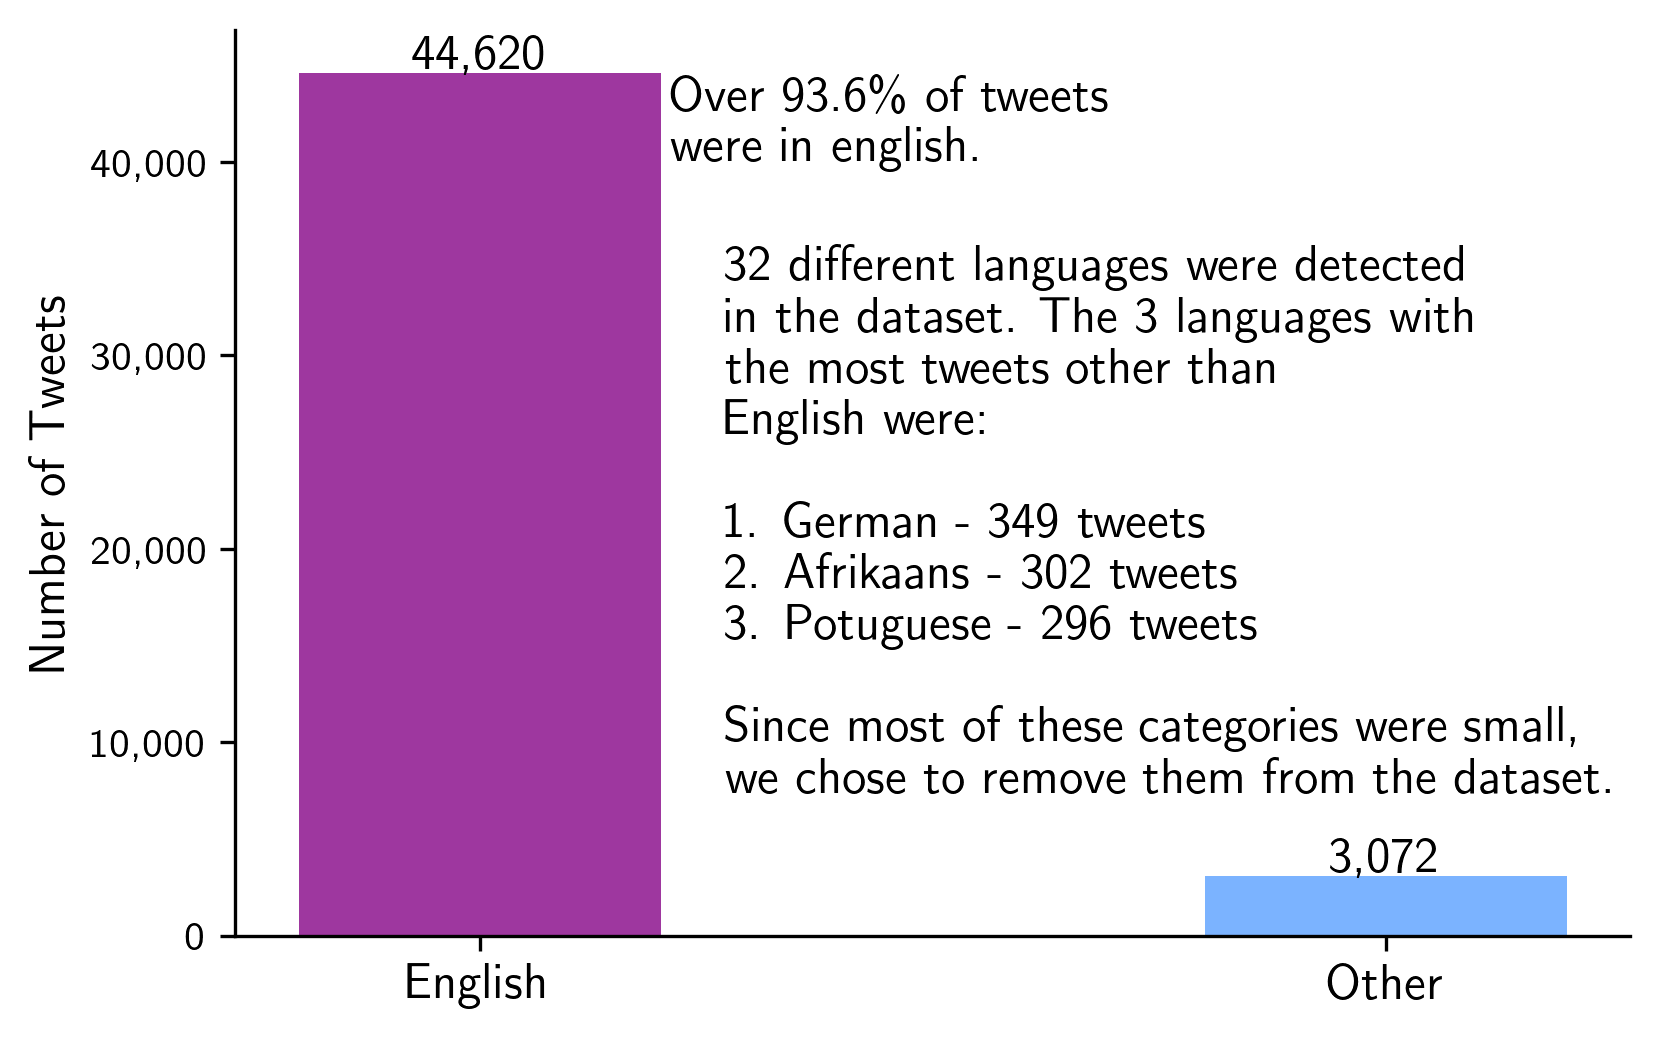

In [23]:
plt.rcParams["figure.figsize"] = [6,4]
plt.rcParams["figure.dpi"] = 300
plt.rcParams["text.usetex"] = True #change to true for final

labels = ["English", "Other"]
xs = [0, 1]
values = [44620, len(df) - 44620] 

fig, ax = plt.subplots()

colors = ["#9e379f", "#7bb3ff"]
bars = ax.bar(xs, values, width = 0.4, color = colors)

ax.set_xticks(xs)
ax.set_xticklabels(labels, fontsize = 12)
ax.spines[["top", "right"]].set_visible(False)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#title
top, bottom = ax.get_ylim()[1], ax.get_ylim()[0]
right, left = ax.get_xlim()[1], ax.get_xlim()[0]
center = sum(ax.get_xlim())/2

# ax.text(center, top + 200, "Distribution of Language of Tweets", va = "bottom", fontsize = 14, ha = "center")

#labels 
ax.text(0, values[0] + 200, "44,620", ha = "center", fontsize = 12)
ax.text(1, values[1] + 200, f"{len(df) - 44620:,}", ha = "center", fontsize = 12)

#annotation1 
anno_text1 = f"""Over {44620/len(df)*100:0.1f}\% of tweets\nwere in english.""" 
ax.text(0.21, values[0] - 200, anno_text1, ha = "left", va = "top", fontsize = 12)

#annotation2 
anno_text2 = f"""{len(lang_df)} different languages were detected
in the dataset. The 3 languages with 
the most tweets other than 
English were: 

    \t1. German - 349 tweets
    \t2. Afrikaans - 302 tweets
    \t3. Potuguese - 296 tweets
    
Since most of these categories were small, 
we chose to remove them from the dataset. 
"""

ax.text(0.27, values[0] - 9000, anno_text2, ha = "left", va = "top", fontsize = 12)

ax.set_ylabel("Number of Tweets", fontsize = 12)

plt.savefig("../../plots/lang_bar_plot.png")

In [9]:
cleaned = pd.read_csv("../../cyberbullying_tweets/processed_tweets.csv")
len(cleaned)

41176

In [8]:
cleaned.groupby("cyberbullying_type").count()

,Unnamed: 0,tweet_text,lang,score,y,tweet_length,ascii,ascii_length
cyberbullying_type,,,,,,,,
age,7845,7845,7845,7845,7845,7845,7845,7845
ethnicity,7272,7272,7272,7272,7272,7272,7272,7272
gender,7218,7218,7218,7218,7218,7218,7218,7218
not_cyberbullying,5996,5996,5996,5996,5996,5996,5996,5996
other_cyberbullying,4959,4959,4959,4959,4959,4959,4959,4959
religion,7886,7886,7886,7886,7886,7886,7886,7886
